<a href="https://colab.research.google.com/github/Shubhankar9934/Deep_Learning/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Market Prediction And Forecasting Using Stacked LSTM**

**Idea Before Starting The Project** ⏬

1. We will collect the Stock Data -- AAPL.

2. Preprocess the Data- Train and Test.

3. Predict the test data and plot the output.

4. Predict the future 30 days and plot the output.

In [1]:
## Using Keras and Tensorflow >2.0

**Step 1: We will collect the Stock Data -- AAPL.**

In [2]:
## Data Collection 

# I am using pandas_datareader
# (https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)
# Created Account In Tiingo and using API

import pandas_datareader as pdr


In [3]:
key = 'd6827cd46c8b2831f4ea516c95e08b56688f6b05'
df = pdr.get_data_tiingo('AAPL',api_key = key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
# Saving DataFrame as .csv format
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd


In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-31 00:00:00+00:00,148.73,150.33,148.13,149.90,19422655,35.193025,35.571623,35.051051,35.469875,77690620,0.0,1.0
1,AAPL,2017-08-01 00:00:00+00:00,150.05,150.22,148.41,149.10,24725526,35.505368,35.545594,35.117306,35.280576,98902104,0.0,1.0
2,AAPL,2017-08-02 00:00:00+00:00,157.14,159.75,156.16,159.28,69222793,37.183030,37.800617,36.951138,37.689404,276891172,0.0,1.0
3,AAPL,2017-08-03 00:00:00+00:00,155.57,157.21,155.02,157.05,26000738,36.811530,37.199593,36.681388,37.161733,104002952,0.0,1.0
4,AAPL,2017-08-04 00:00:00+00:00,156.39,157.40,155.69,156.07,20349532,37.005562,37.244552,36.839925,36.929842,81398128,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-07-25 00:00:00+00:00,152.95,155.040,152.28,154.010,53623945,152.95,155.040,152.28,154.010,53623945,0.0,1.0
1255,AAPL,2022-07-26 00:00:00+00:00,151.60,153.085,150.80,152.265,55138691,151.60,153.085,150.80,152.265,55138691,0.0,1.0
1256,AAPL,2022-07-27 00:00:00+00:00,156.79,157.330,152.16,152.580,78620688,156.79,157.330,152.16,152.580,78620688,0.0,1.0
1257,AAPL,2022-07-28 00:00:00+00:00,157.35,157.640,154.41,156.980,81378731,157.35,157.640,154.41,156.980,81378731,0.0,1.0
1258,AAPL,2022-07-29 00:00:00+00:00,162.51,163.630,159.50,161.240,101291643,162.51,163.630,159.50,161.240,101291643,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1

0       148.73
1       150.05
2       157.14
3       155.57
4       156.39
         ...  
1254    152.95
1255    151.60
1256    156.79
1257    157.35
1258    162.51
Name: close, Length: 1259, dtype: float64

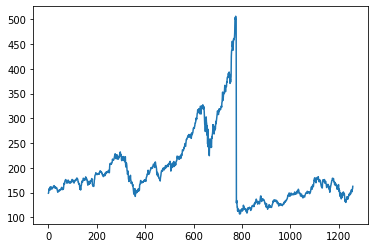

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

**LSTM are very very sensitive to the scale of data . so we apply MinMax scaler where we trasfering our value between zero to one.**


In [12]:
import numpy as np

In [13]:
df1

0       148.73
1       150.05
2       157.14
3       155.57
4       156.39
         ...  
1254    152.95
1255    151.60
1256    156.79
1257    157.35
1258    162.51
Name: close, Length: 1259, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1

array([[0.10492173],
       [0.10822793],
       [0.12598622],
       ...,
       [0.12510958],
       [0.12651221],
       [0.13943644]])

In [24]:
df1.shape

(1259, 1)

**_____________________________________Step 1 is done_________________________**

**Step 2: Preprocess the Data- Train and Test.**

Whenever we are dealing with timeseries data , suppose the first day stock be like ........>
120,130,125,140,134,150,160,190,154

first step we are dealing during train test split is that,there are various ways of doing train test split like......>

Cross Validation,
random seed

In case of TimeSeries data we should try to divide the data set in differnet ways---->

first of all what we do is that in taining data we consider 70% of a dataset as intial data and that should be ordered with respect to date.

we can besically say that Day2 is Dependent on Day1, Day3 is dependent on Day2 and Day1, Similary Day4 is Dependent on Day3,Day2, and Day1 and so on.

thats why we should divide the dataset based on date.

for example suppose we have a dataset ---> 120,130,125,140,134,150,|||160,190,154.

Timeseries data---> Train -120,130,125,140,134,150.(70%)
                    Test -160,190,154.(30%)
After doing this division we are trying do data preprocessing

so, at the end always understand that if you have any kind of timeseries data you always should have data on which one data should dependent on previous data.

In [25]:
# Splitting dataset into train and test split
training_size=int(len(df1)*0.65)
# In this case i am saying that 65% of data of total dataset is my training size

In [26]:
test_size=len(df1)-training_size
# In This statement we saying that test size data is equal to 
# Total Size of dataset - Training_size.


In [27]:
# Now creating My train_data and test_data
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(818, 441)

In [29]:
train_data

array([[1.04921728e-01],
       [1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],


In [30]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [59]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [60]:
print(X_train)

[[0.10492173 0.10822793 0.12598622 ... 0.16814026 0.17427677 0.16956794]
 [0.10822793 0.12598622 0.12205385 ... 0.17427677 0.16956794 0.16909205]
 [0.12598622 0.12205385 0.1241077  ... 0.16956794 0.16909205 0.17074515]
 ...
 [0.54226675 0.54672511 0.53971196 ... 0.02289292 0.02672511 0.0251221 ]
 [0.54672511 0.53971196 0.56270507 ... 0.02672511 0.0251221  0.02231684]
 [0.53971196 0.56270507 0.56761428 ... 0.0251221  0.02231684 0.02053851]]


In [56]:
y_train

array([1.69092048e-01, 1.70745147e-01, 1.70745147e-01, 1.59624296e-01,
       1.59699436e-01, 1.60901691e-01, 1.56268003e-01, 1.63857232e-01,
       1.63782091e-01, 1.65785848e-01, 1.70720100e-01, 1.69092048e-01,
       1.69041954e-01, 1.68941766e-01, 1.71421415e-01, 1.75954915e-01,
       1.73700689e-01, 1.80989355e-01, 1.81390106e-01, 1.79386349e-01,
       1.75729493e-01, 1.75829681e-01, 1.68766437e-01, 1.60976832e-01,
       1.61978710e-01, 1.53087038e-01, 1.50607389e-01, 1.51759549e-01,
       1.52636193e-01, 1.34402004e-01, 1.24358172e-01, 1.40738885e-01,
       1.31997495e-01, 1.21001879e-01, 1.24157796e-01, 1.39937383e-01,
       1.44020038e-01, 1.51609267e-01, 1.65685661e-01, 1.64283031e-01,
       1.62830307e-01, 1.60876644e-01, 1.64458359e-01, 1.71972448e-01,
       1.80663745e-01, 1.79211021e-01, 1.78534753e-01, 1.70720100e-01,
       1.73750783e-01, 1.75278647e-01, 1.74902943e-01, 1.70795241e-01,
       1.75579211e-01, 1.83193488e-01, 1.87551659e-01, 1.83168441e-01,
      

In [61]:
X_test

array([[0.01092048, 0.02123982, 0.00505949, ..., 0.03293676, 0.04145272,
        0.03932373],
       [0.02123982, 0.00505949, 0.00483406, ..., 0.04145272, 0.03932373,
        0.03318723],
       [0.00505949, 0.00483406, 0.00901691, ..., 0.03932373, 0.03318723,
        0.03443957],
       ...,
       [0.14958046, 0.14875391, 0.14108954, ..., 0.12150282, 0.1183469 ,
        0.11549155],
       [0.14875391, 0.14108954, 0.13139637, ..., 0.1183469 , 0.11549155,
        0.11211021],
       [0.14108954, 0.13139637, 0.12673763, ..., 0.11549155, 0.11211021,
        0.12510958]])

In [62]:
y_test

array([0.03318723, 0.03443957, 0.03599249, 0.03644333, 0.03271133,
       0.0383469 , 0.04047589, 0.04773951, 0.04851597, 0.0527489 ,
       0.05891046, 0.06551033, 0.06111459, 0.06910457, 0.0630933 ,
       0.0692799 , 0.0684283 , 0.0701315 , 0.06579837, 0.0667752 ,
       0.06286788, 0.06882905, 0.06983093, 0.06900438, 0.06697558,
       0.06672511, 0.06166562, 0.0643707 , 0.05262367, 0.05324984,
       0.05735755, 0.05853475, 0.05011897, 0.04776456, 0.03989981,
       0.04541014, 0.05162179, 0.04866625, 0.04510958, 0.04470883,
       0.05127113, 0.0465623 , 0.05074515, 0.05024421, 0.05011897,
       0.0461866 , 0.04450845, 0.0436819 , 0.04563557, 0.04182843,
       0.04771446, 0.04773951, 0.04984346, 0.05082029, 0.0482655 ,
       0.05137132, 0.05921102, 0.05710708, 0.05838447, 0.06249217,
       0.05916093, 0.06376957, 0.06797746, 0.06727614, 0.06654978,
       0.06579837, 0.06998121, 0.07386349, 0.07544145, 0.07621791,
       0.08295554, 0.08811522, 0.09450219, 0.09117095, 0.09585

In [63]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [64]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [65]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [66]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0028 - val_loss: 2.6067e-04
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0032 - val_loss: 3.7122e-04
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0033 - val_loss: 2.2412e-04
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 1.7848e-04
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0017 - val_loss: 2.3068e-04
Epoch 6/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 1.6685e-04
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 2.6600e-04
Epoch 8/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 2.5172e-04
Epoch 9/100
12/12 [==============================] - 0s 22ms/step - loss: 9.7278e-04 - val_loss: 2.1480e-04
Epoch 10/100
12/12 [==============================] - 0s 22m

In [88]:
import tensorflow as tf

In [89]:
tf.__version__

'2.8.2'

In [90]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [91]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [92]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.029264033384312726

In [93]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.010603154496518446

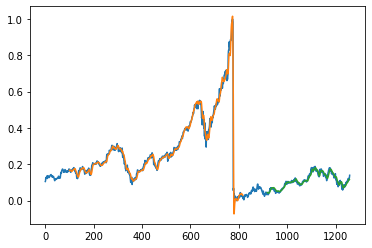

In [94]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [95]:
len(test_data)

441

In [96]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [97]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [98]:
temp_input

[0.12673763306199123,
 0.14053850970569812,
 0.12944270507201003,
 0.11994990607388847,
 0.10965560425798374,
 0.12085159674389481,
 0.13212273011897305,
 0.1347025673137132,
 0.14311834690043826,
 0.1466249217282404,
 0.15524107701941134,
 0.15872260488415782,
 0.16839073262366935,
 0.17001878522229177,
 0.17222291797119596,
 0.18063869755792109,
 0.17765810895428932,
 0.1697432686286788,
 0.1689918597370069,
 0.17933625547902313,
 0.17087038196618656,
 0.162780212899186,
 0.16355666875391353,
 0.15842204132748902,
 0.1475516593613024,
 0.15233562930494673,
 0.15919849718221665,
 0.14639949906073887,
 0.14584846587351283,
 0.1516844082654978,
 0.15125860989355036,
 0.14922980588603627,
 0.1376330619912335,
 0.14036318096430803,
 0.12513462742642453,
 0.12455854727614271,
 0.14226675015654347,
 0.12726361928616156,
 0.1280400751408892,
 0.13184721352536002,
 0.14822792736380716,
 0.12505948653725737,
 0.12633688165309956,
 0.11326236693800876,
 0.11939887288666248,
 0.09933625547902317

In [99]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.12264209]
101
1 day input [0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651

In [100]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [101]:
import matplotlib.pyplot as plt

In [102]:
len(df1)

1259

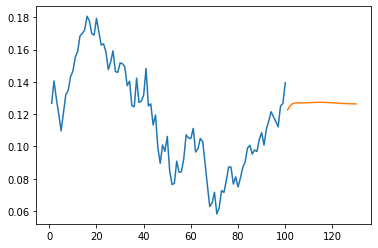

In [104]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

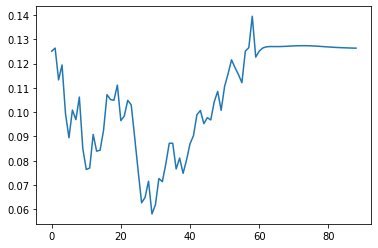

In [105]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [106]:
df3=scaler.inverse_transform(df3).tolist()

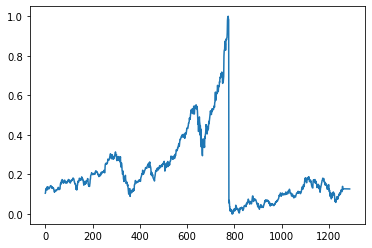

In [107]:
plt.plot(df3)